# Neural Network
Information starts at the input neurons and travels to the next layers of neurons having whats called a weight and a bias applied to it. These weight and biases start out randomly determined and are tweaked as the network learns and sees more data. After reaching a new layer there is a function applied to each neurons value that is called an activation function.

In [ ]:
import tensorflow as tf 
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt

data = keras.datasets.fashion_mnist

# Loading Data

In [ ]:
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images/255.0
test_images = test_images/255.0

# each image is greyscale we are simply scaling the pixel values down to make computations easier for our model.

# Model Building
Each Image in Dataset is 28x28, that is 784, so the input filter will be applied 784 neurons, the hidden layer here is 128 neurons, and as the output no of classes are 10, so the output filter be 10 neurons representing the probability of the picture being each of the 10 classes.

In [ ]:
model = keras.Sequential([
            keras.layers.Flatten(input_shape=(28,28)),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.Dense(10, activation='softmax')
])

# Model Training


In [ ]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy" , metrics=["accuracy"])

model.fit(train_images, train_labels, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4989 - accuracy: 0.8248
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3797 - accuracy: 0.8632
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3375 - accuracy: 0.8766
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3160 - accuracy: 0.8836
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.3500 - accuracy: 0.8772

Test accuracy: 0.8772000074386597


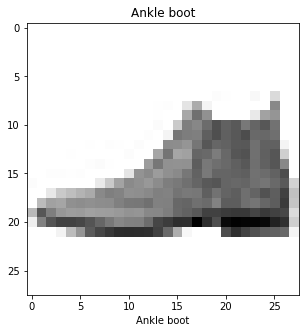

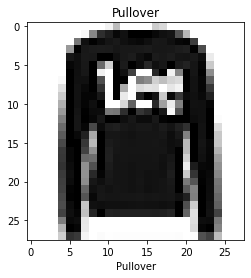

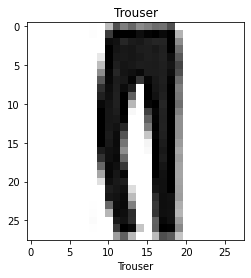

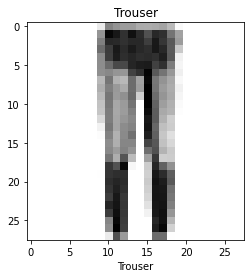

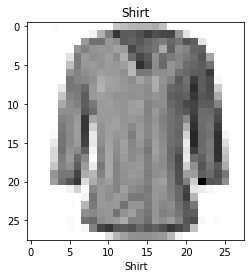

In [ ]:
predictions = model.predict(test_images)
plt.figure(figsize=(5,5))
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
    plt.title(class_names[np.argmax(predictions[i])])
    plt.show()

# Text Classification 

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy

imdb = keras.datasets.imdb #movie dataset

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

each word in our reviews are represented as positive integers where each integer represents a specific word. This is necessary as we cannot pass strings to our neural network. 


dictionary that maps all of our words to an integer, add some more keys to it like , etc. and then reverse that dictionary so we can use integers as keys that map to each word. The function defied will take as a list the integer encoded reviews and return the human readable version.

In [ ]:
# A dictionary mapping words to an integer index
_word_index = imdb.get_word_index()

#print(_word_index)

word_index = {k:(v+3) for k,v in _word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

#print(word_index)
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
#print(reverse_word_index)

def decode_review(text):
	return " ".join([reverse_word_index.get(i, "?") for i in text])

# this function will return the decoded (human readable) reviews

In [ ]:
print(train_data)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

If we have a look at some of our loaded in reviews we'll notice that they are different lengths. This is an issue. We cannot pass different length data into out neural network. Therefore we must make each review the same length. To do this we will follow the procedure below:
- if the review is greater than 250 words then trim off the extra words
- if the review is less than 250 words add the necessary amount of 's to make it equal to 250.

In [ ]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], padding="post", maxlen=250)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], padding="post", maxlen=250)

In [ ]:
print(train_data)

[[   1   14   22 ...    0    0    0]
 [   1  194 1153 ...    0    0    0]
 [   1   14   47 ...    0    0    0]
 ...
 [   1   11    6 ...    0    0    0]
 [   1 1446 7079 ...    0    0    0]
 [   1   17    6 ...    0    0    0]]


# Model Summary

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(88000, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

model.summary()  # prints a summary of the model

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          1408000   
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 16)                272       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,408,289
Trainable params: 1,408,289
Non-trainable params: 0
_________________________________________________________________


## Word Embeddings
Human Readable:
Have a great day

Have a good day

Integer encoded:
[0, 1, 2, 3]

[0, 1, 4, 3]

Mappings: {0: "Have", 1: "a", 2: "great", 3: "day", 4: "good"}

Looking at the sentences above, we as humans know that the two sentences are very similar and pretty well mean the same thing. However when we look at the integer encoded version all we can tell is that the words at index 2 (position 3) are different. We have no idea how different they are.

This is where a word embedding layer comes in. We want a way to determine not only the contents of a sentence but the context of the sentence. A word embedding layer will attempt to determine the meaning of each word in the sentence by mapping each word to a position in vector space. If you don't care about the math or don't understand it think of it as just grouping similar words together.

An example of something we'd hope an embedding layer would do for us:

Maybe "good", "great", "fantastic" and "awesome" are placed close to each other and words like "bad", "horrible", "sucks" are placed close together. We'd also hope that these groupings of words are placed far apart from each other representing that they have very different meanings.


## GlobalPooling1D Layer
This layer is nothing special and simply scales down our data's dimension to make it easier computationally for our model in the later layers. Because our word embedding layer maps thousands and thousands of words to a location in vector space they usually do this in a high dimensional vector space. This means when we get our word vectors from the embedding layer they have multiple dimensions and can be scaled down by this layer.

## Dense Layers
The last two layers in our network are dense fully connected layers. The output layer is one neuron that uses the sigmoid function to get a value between a 0 and a 1 which will represent the likelihood of the review being positive or negative. The layer before that contains 16 neurons with a relu activation function designed to find patterns between different words present in the review.

In [ ]:
x_val = train_data[:10000]
x_train = train_data[10000:]

y_val = train_labels[:10000]
y_train = train_labels[10000:]

model.compile(optimizer='adam', loss="binary_crossentropy" , metrics=["accuracy"])
fitModel = model.fit(x_train, y_train, epochs=40, batch_size=512, validation_data=(x_val, y_val), verbose=1)



Epoch 1/40
30/30 [==============================] - 2s 39ms/step - loss: 0.6912 - accuracy: 0.5236 - val_loss: 0.6883 - val_accuracy: 0.5749
Epoch 2/40
30/30 [==============================] - 1s 33ms/step - loss: 0.6828 - accuracy: 0.6612 - val_loss: 0.6773 - val_accuracy: 0.6958
Epoch 3/40
30/30 [==============================] - 1s 34ms/step - loss: 0.6665 - accuracy: 0.7297 - val_loss: 0.6582 - val_accuracy: 0.7290
Epoch 4/40
30/30 [==============================] - 1s 34ms/step - loss: 0.6404 - accuracy: 0.7663 - val_loss: 0.6296 - val_accuracy: 0.7624
Epoch 5/40
30/30 [==============================] - 1s 33ms/step - loss: 0.6045 - accuracy: 0.7925 - val_loss: 0.5927 - val_accuracy: 0.7930
Epoch 6/40
30/30 [==============================] - 1s 33ms/step - loss: 0.5608 - accuracy: 0.8173 - val_loss: 0.5501 - val_accuracy: 0.8139
Epoch 7/40
30/30 [==============================] - 1s 33ms/step - loss: 0.5130 - accuracy: 0.8373 - val_loss: 0.5074 - val_accuracy: 0.8257
Epoch 8/40
30

In [ ]:
results = model.evaluate(test_data, test_labels)
print(results)

782/782 [==============================] - 1s 2ms/step - loss: 0.3355 - accuracy: 0.8694
[0.33552074432373047, 0.8694400191307068]


In [ ]:
test_review = test_data[0]
predict = model.evaluate(test_data, test_labels)
print("Review")
print(decode_review(test_review))
print("Prediction: "+str(predict[0]))
print("Actual: " + str(test_labels[0]))
print(results)

782/782 [==============================] - 1s 2ms/step - loss: 0.3355 - accuracy: 0.8694
Review
<START> please give this one a miss br br <UNK> <UNK> and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite <UNK> so all you madison fans give this a miss <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PA

In [ ]:
model.save("model.h5")  # name it whatever you want but end with .h5

model = keras.models.load_model("model.h5")

def review_encode(s):
	encoded = [1]

	for word in s:
		if word.lower() in word_index:
			encoded.append(word_index[word.lower()])
		else:
			encoded.append(2)

	return encoded






In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:

with open("/content/drive/MyDrive/Deep Learning/test.txt", encoding="utf-8") as f:
	for line in f.readlines():
		nline = line.replace(",", "").replace(".", "").replace("(", "").replace(")", "").replace(":", "").replace("\"","").strip().split(" ")
		encode = review_encode(nline)
		encode = keras.preprocessing.sequence.pad_sequences([encode], value=word_index["<PAD>"], padding="post", maxlen=250) # make the data 250 words long
		predict = model.predict(encode)
		print(line)
		print(encode)
		print(predict[0])